# Data distribution 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(r'C:\Users\tejas\Downloads\dataset_diabetes\dataset_diabetes\diabetic_data.csv')
df.info()
missing_values = df.isnull().sum()
print(missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

Text(0.5, 1.0, 'Distribution of Number of Medications Prescribed')

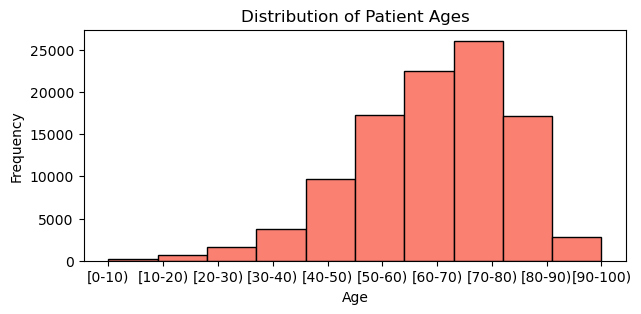

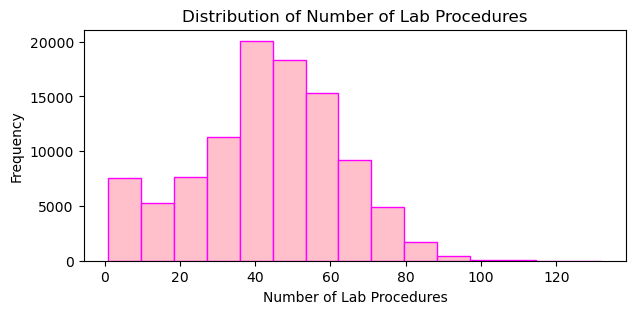

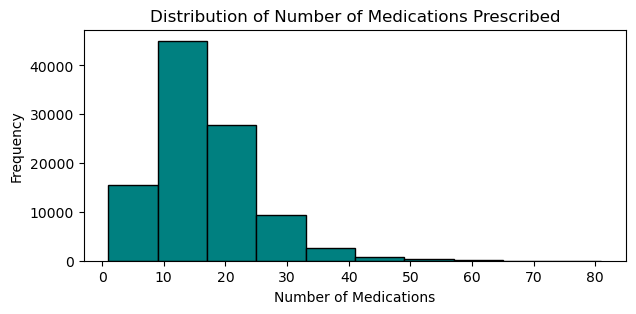

In [2]:
fig, axs = plt.subplots(figsize =(7, 3))
axs.hist(df.age, bins=10, color='salmon', edgecolor='black')
axs.set_xlabel('Age')
axs.set_ylabel('Frequency')
axs.set_title('Distribution of Patient Ages')
fig, axs = plt.subplots(figsize =(7, 3))
axs.hist(df.num_lab_procedures, bins=15, color='pink', edgecolor='magenta')
axs.set_xlabel('Number of Lab Procedures')
axs.set_ylabel('Frequency')
axs.set_title('Distribution of Number of Lab Procedures')
fig, axs = plt.subplots(figsize =(7, 3))
axs.hist(df.num_medications, bins=10, color='teal', edgecolor='black')
axs.set_xlabel('Number of Medications')
axs.set_ylabel('Frequency')
axs.set_title('Distribution of Number of Medications Prescribed')


# Scatter plots

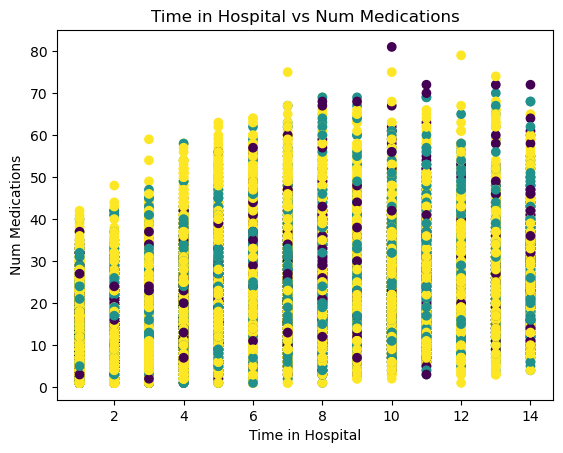

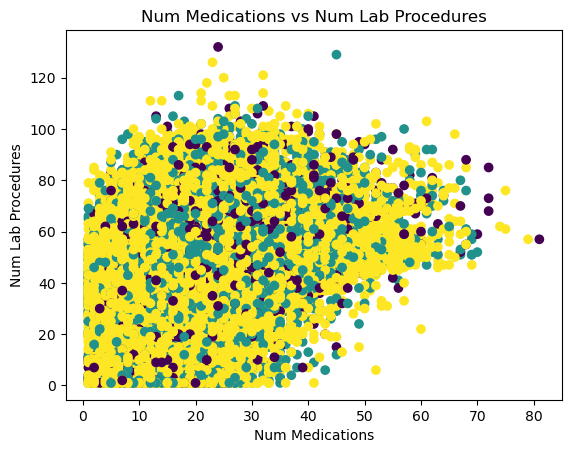

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['readmitted'] = le.fit_transform(df['readmitted'])
time_in_hospital = df['time_in_hospital']
num_medications = df['num_medications']
num_lab_procedures = df['num_lab_procedures']
readmitted = df['readmitted']

plt.scatter(time_in_hospital, num_medications, c=readmitted)
plt.xlabel('Time in Hospital')
plt.ylabel('Num Medications')
plt.title('Time in Hospital vs Num Medications')
plt.show()

plt.scatter(num_medications, num_lab_procedures, c=readmitted)
plt.xlabel('Num Medications')
plt.ylabel('Num Lab Procedures')
plt.title('Num Medications vs Num Lab Procedures')
plt.show()


# Using elbow technique to determine optimal cluster number

C:\Users\tejas\AppData\Local\Temp\ipykernel_161080\4287905907.py:18: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df.replace('?', pd.np.nan, inplace=True)
C:\Users\tejas\AppData\Local\Temp\ipykernel_161080\4287905907.py:20: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()
C:\Users\tejas\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\tejas\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the valu

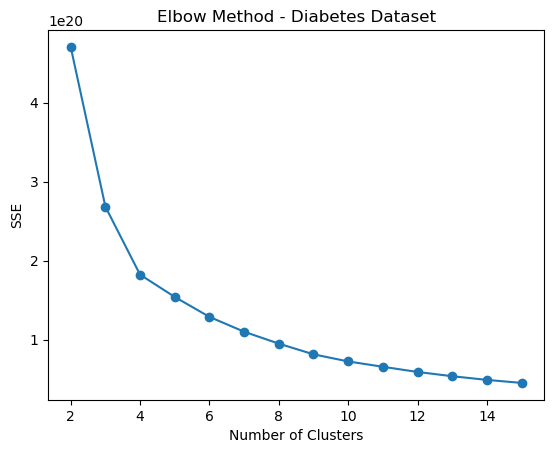

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv(r'C:\Users\tejas\Downloads\dataset_diabetes\dataset_diabetes\diabetic_data.csv')


cat = ['max_glu_serum','A1Cresult','metformin','race', 'nateglinide','chlorpropamide','glimepiride',
                       'gender', 'age','weight', 'admission_type_id','diag_3','diag_1','diag_2','repaglinide',
                       'discharge_disposition_id', 'admission_source_id', 'payer_code', 'medical_specialty']

for col in cat:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    
df.replace('?', pd.np.nan, inplace=True)
df.dropna(inplace=True)
corr_matrix = df.corr()

corr = corr_matrix.abs().unstack().sort_values(ascending=False).drop_duplicates()[:40:2]


df = df.loc[:, ['encounter_id','patient_nbr','payer_code', 'time_in_hospital' ,'num_lab_procedures','age',
                'discharge_disposition_id','number_inpatient','number_emergency','number_diagnoses','num_medications',
                 'admission_source_id', 'medical_specialty','admission_type_id', 'race',  'num_procedures']]
val = range(2, 16)

# Compute the sum of squared distances for each k value
dsse = []

for k in val:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    dsse.append(kmeans.inertia_)

# Plot the SSE for each k value
plt.plot(val, dsse, marker='o')
plt.title('Elbow Method - Diabetes Dataset')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()


# calculating sse using k-means clustering

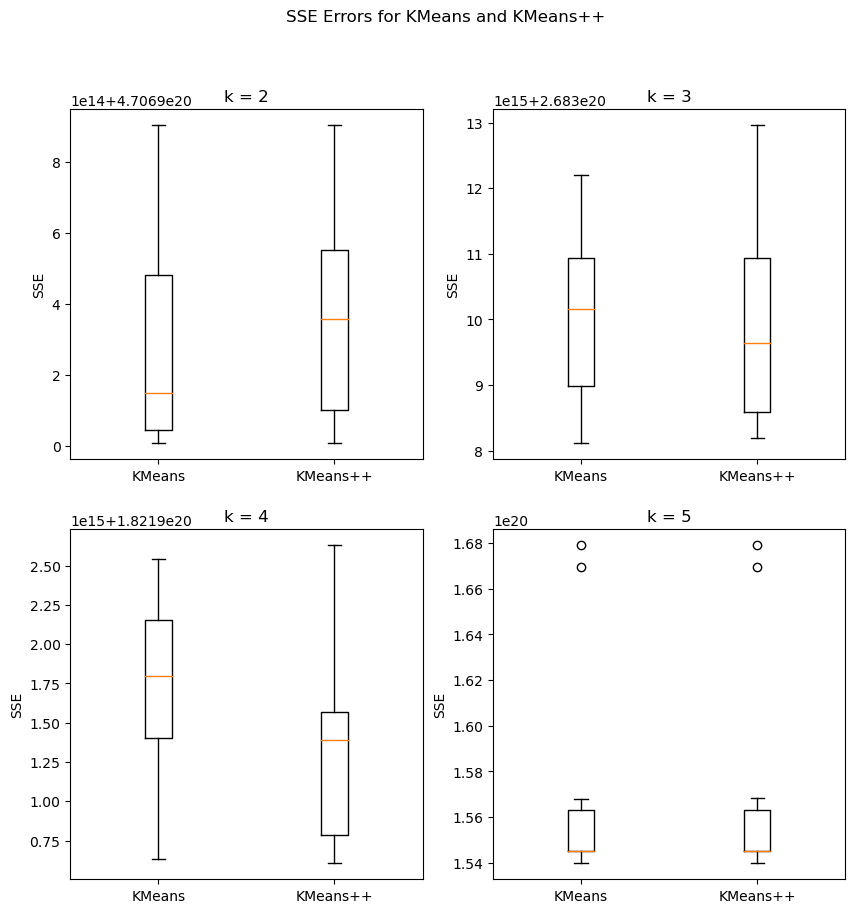

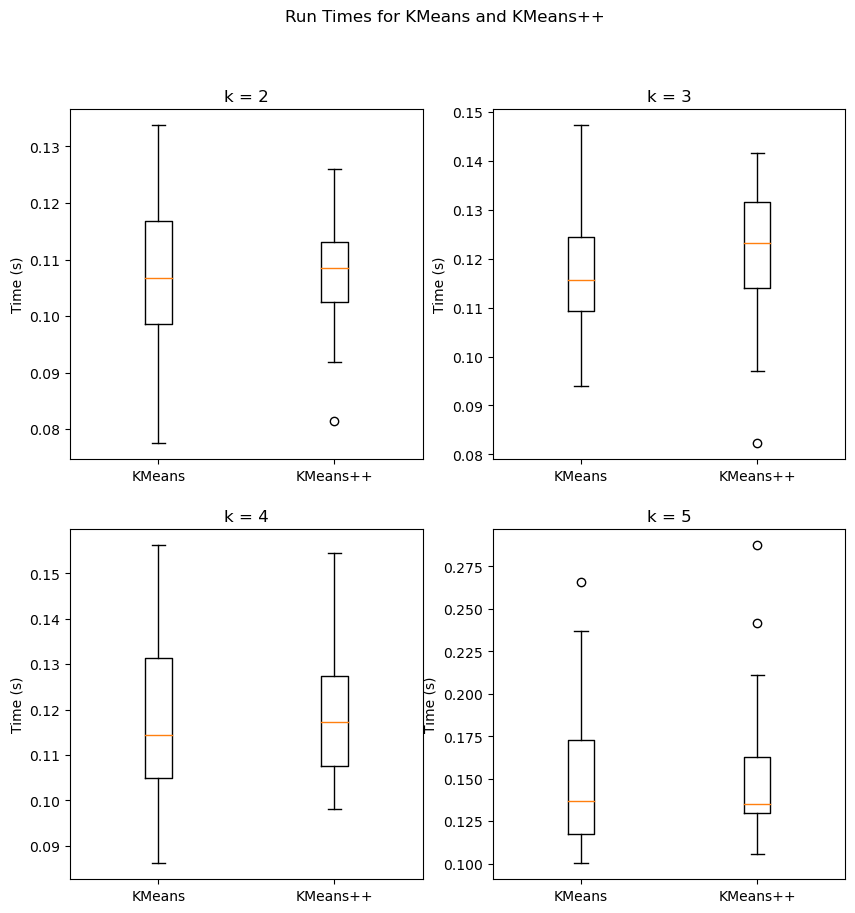

In [6]:
import time
val = [2, 3, 4, 5]
count = 20

error = []
perror = []

ktime = []
ptime = []

for k in val:
    error_k = []
    perror_k = []
    
    time_k = []
    ptime_k = []
    
    for i in range(count):
        start = time.time()
        kmeans = KMeans(n_clusters=k, n_init=1, init='random').fit(df)
        end = time.time()
        
        pstart = time.time()
        kmeans_plusplus = KMeans(n_clusters=k, n_init=1, init='k-means++').fit(df)
        pend = time.time()
        
        error_k.append(kmeans.inertia_)
        perror_k.append(kmeans_plusplus.inertia_)
        
        time_k.append(end - start)
        ptime_k.append(pend - pstart)
    
    error.append(error_k)
    perror.append(perror_k)
    
    ktime.append(time_k)
    ptime.append(ptime_k)

fig, buff = plt.subplots(2, 2, figsize=(10,10))
for i in range(len(val)):
    m = i // 2
    n = i % 2
    buff[m][n].boxplot([error[i], perror[i]])
    buff[m][n].set_title('k = ' + str(val[i]))
    buff[m][n].set_xticklabels(['KMeans', 'KMeans++'])
    buff[m][n].set_ylabel('SSE')
plt.suptitle('SSE Errors for KMeans and KMeans++')
plt.show()

# Plot run times
fig, buff = plt.subplots(2, 2, figsize=(10,10))
for i in range(len(val)):
    m = i // 2
    n = i % 2
    buff[m][n].boxplot([ktime[i], ptime[i]])
    buff[m][n].set_title('k = ' + str(val[i]))
    buff[m][n].set_xticklabels(['KMeans', 'KMeans++'])
    buff[m][n].set_ylabel('Time (s)')
plt.suptitle('Run Times for KMeans and KMeans++')
plt.show()


